# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [42]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('D:\Data Science\Springboard\hospital_readmit\data\cms_hospital_readmissions.csv')
print(hospital_read_df['Measure Name'].unique())
print(hospital_read_df.head(5))

['READM-30-HIP-KNEE-HRRP' 'READM-30-HF-HRRP' 'READM-30-COPD-HRRP'
 'READM-30-PN-HRRP' 'READM-30-AMI-HRRP']
                               Hospital Name  Provider Number State  \
0       FROEDTERT MEMORIAL LUTHERAN HOSPITAL           520177    WI   
1                        PROVIDENCE HOSPITAL            90006    DC   
2          BEAUFORT COUNTY MEMORIAL HOSPITAL           420067    SC   
3  ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER           140208    IL   
4          BRAZOSPORT REGIONAL HEALTH SYSTEM           450072    TX   

             Measure Name Number of Discharges  Footnote  \
0  READM-30-HIP-KNEE-HRRP                  242       NaN   
1  READM-30-HIP-KNEE-HRRP                  247       NaN   
2  READM-30-HIP-KNEE-HRRP                  586       NaN   
3  READM-30-HIP-KNEE-HRRP                  965       NaN   
4  READM-30-HIP-KNEE-HRRP                  149       NaN   

   Excess Readmission Ratio  Predicted Readmission Rate  \
0                    1.9095                   

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Olarn\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


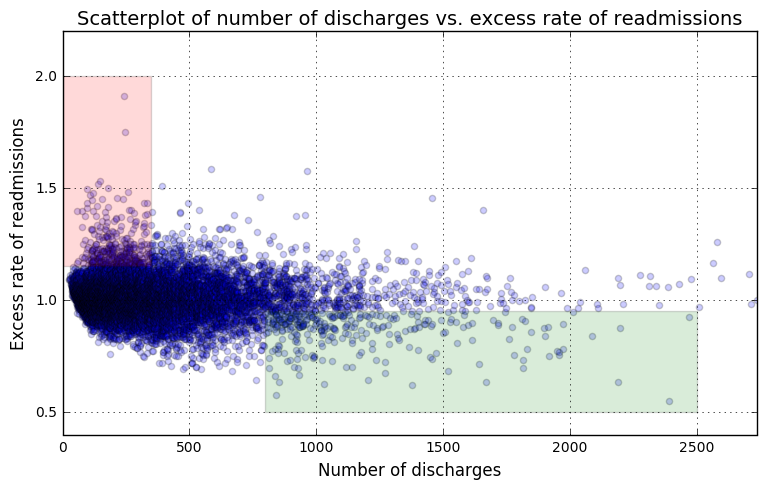

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

A. I don't agree with the recommendation based on the analysis performed because we concluded that hospitals with less than 300 discharges per year should change operations when the tests were performed on different ranges (i.e. <100 and >1000). The appropriate test should be testing statistical signifiance between <300 and >300 groups. 

Moreover,  only capacity/discharge rate and excess ratio of each hospital was analyzed. The data set contains several other features that could have a large influence on the way we look at the data. For example, the state that a hospital could be highly correlated with whether or not the hospital's readmissions rate is higher or lower. One could guess that more densely and highly populated states would have higher capacity hospitals with better equipment, while less populated states may have smaller hospitals and worse equipment. Moreover, the reason for readmission is important in understanding readmissions rates. We may find that hospitals that are experience high levels of readmissions were being driven by patients possessing a particular condition (which is out of their control) as opposed to the hospital's operational inefficiencies. I will analyze these hypotheses with statistical tests. 

B. The correct null hypothesis is that hospitals with less than 300 discharges aren't statistically significantly different from hospitals with more than 300 discharges. The alternative hypothesis is that they are. 

In [76]:
ratio = clean_hospital_read_df['Excess Readmission Ratio']
lower_bound = clean_hospital_read_df['Number of Discharges'] <= 300
upper_bound = clean_hospital_read_df['Number of Discharges'] > 300

lower_ratio = ratio[lower_bound]
upper_ratio = ratio[upper_bound]

total_lower = len(lower_ratio)
total_upper = len(upper_ratio)
print(total_lower, total_upper)

print(((np.std(upper_ratio)** 2)/total_upper), ((np.std(lower_ratio)**2)/total_lower))
print('lower mean and standard deviation are: %f & %f' % (np.mean(lower_ratio), np.std(lower_ratio)))
print('upper mean and standard deviation are: %f & %f' % (np.mean(upper_ratio), np.std(upper_ratio)))

combined_mean = np.mean(upper_ratio) - np.mean(lower_ratio)
combined_std = np.sqrt(((np.std(upper_ratio)** 2)/total_upper) +
                       ((np.std(lower_ratio)**2)/total_lower))

print('combined mean and standard deviation are: %f & %f' % (combined_mean, combined_std))

combined_t_score = combined_mean/combined_std
print('combined t-score is: %f' % combined_t_score)
                                     

6213 5365
1.9098813521471184e-06 1.09333766129897e-06
lower mean and standard deviation are: 1.014261 & 0.082419
lower mean and standard deviation are: 0.999781 & 0.101225
combined mean and standard deviation are: -0.014480 & 0.001733
combined t-score is: -8.355266


B. I would like to test whether or not there is a statistically difference between patients being readmitted for Hip Failure
versus patients who were not readmitted for other conditions. My null hypothesis is that there is no difference between the two populations, while my alternative hypothesis is that there is a difference between the two populations. According to the double sided t-test at alpha = 0.01, the t-value significance threshold is 2.60. With our t-value of 8.35, we can safely reject the null hypothesis and conclude that there is a statistically significant difference between the two populations. 

Although there is a statistically significant difference in this scenario, the effect size is small as the difference in the raw values are incredibly small to begin with. This analysis allows us to conclude that there is indeed a difference between the two groups. However, we cannot conclude and recommend changes based off of this analysis because the effect size is too small. It is worth exploring if other features in the data set are influencing the results we're seeing. 

11494 11494


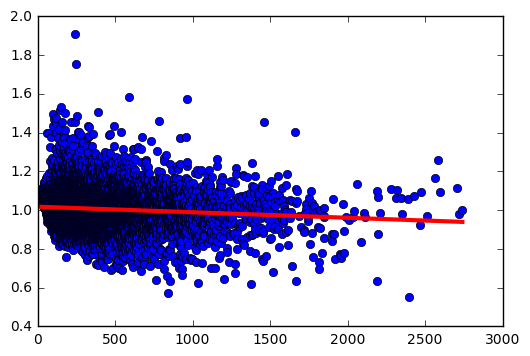

In [57]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = np.array([a for a in clean_hospital_read_df['Number of Discharges'][81:-3]])
y = np.array(list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3]))
print(len(x), len(y))
plt.plot(x, y, 'o', color = 'blue')
m, b = np.polyfit(x, y , 1)
plt.plot(x, m*x + b, '-', color='red', linewidth=3.0)
plt.show()

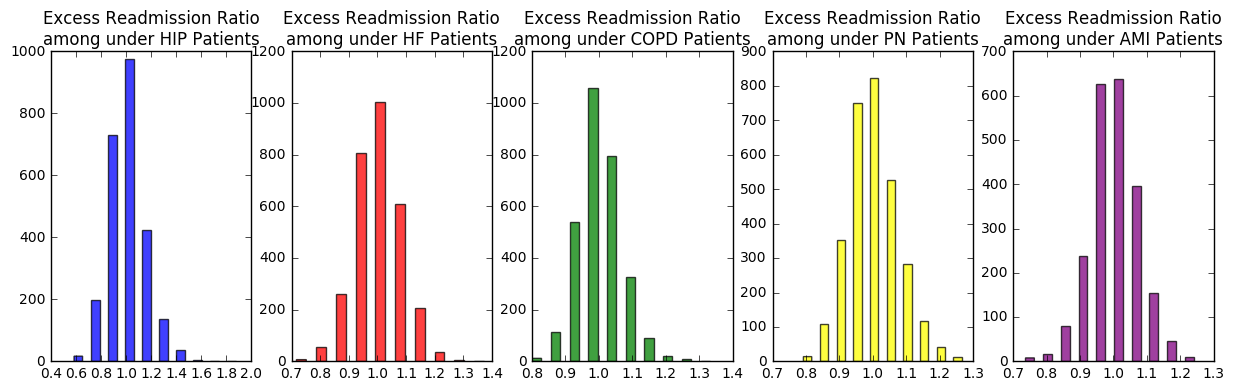

average and standard deviation of HIP: 1.007436 & 0.146171
average and standard deviation of HF: 1.001474 & 0.080007
average and standard deviation of COPD: 1.001612 & 0.064766
average and standard deviation of PN: 1.001459 & 0.074906
average and standard deviation of AMI: 1.001377 & 0.071277


In [44]:
import textwrap
import numpy as np

mask_1 = hospital_read_df['Measure Name'] == 'READM-30-HIP-KNEE-HRRP'
mask_2 = hospital_read_df['Measure Name'] == 'READM-30-HF-HRRP'
mask_3 = hospital_read_df['Measure Name'] == 'READM-30-COPD-HRRP'
mask_4 = hospital_read_df['Measure Name'] == 'READM-30-PN-HRRP'
mask_5 = hospital_read_df['Measure Name'] == 'READM-30-AMI-HRRP'

hip_population = hospital_read_df[mask_1]
hf_population = hospital_read_df[mask_2]
copd_population = hospital_read_df[mask_3]
pn_population = hospital_read_df[mask_4]
ami_population = hospital_read_df[mask_5]

x_1 = np.array([a for a in hip_population['Excess Readmission Ratio']])
x_1 = x_1[~np.isnan(x_1)]

x_2 = np.array([a for a in hf_population['Excess Readmission Ratio']])
x_2 = x_2[~np.isnan(x_2)]

x_3 = np.array([a for a in copd_population['Excess Readmission Ratio']])
x_3 = x_3[~np.isnan(x_3)]

x_4 = np.array([a for a in pn_population['Excess Readmission Ratio']])
x_4 = x_4[~np.isnan(x_4)]

x_5 = np.array([a for a in ami_population['Excess Readmission Ratio']])
x_5 = x_5[~np.isnan(x_5)]


fig, axes = plt.subplots(1, 5, figsize=(15, 4))

axes[0].hist(x_1, facecolor = 'blue', alpha=.75, rwidth = .5)
axes[0].set_title(textwrap.fill('Excess Readmission Ratio among under HIP Patients',27))

axes[1].hist(x_2, facecolor = 'red', alpha=.75, rwidth = .5)
axes[1].set_title(textwrap.fill('Excess Readmission Ratio among under HF Patients',27))

axes[2].hist(x_3, facecolor = 'green', alpha=.75, rwidth = .5)
axes[2].set_title(textwrap.fill('Excess Readmission Ratio among under COPD Patients',27))

axes[3].hist(x_4, facecolor = 'yellow', alpha=.75, rwidth = .5)
axes[3].set_title(textwrap.fill('Excess Readmission Ratio among under PN Patients',27))

axes[4].hist(x_5, facecolor = 'purple', alpha=.75, rwidth = .5)
axes[4].set_title(textwrap.fill('Excess Readmission Ratio among under AMI Patients',27))
plt.show()

print('average and standard deviation of HIP: %f & %f' % (np.mean(x_1), np.std(x_1)))
print('average and standard deviation of HF: %f & %f' % (np.mean(x_2), np.std(x_2)))
print('average and standard deviation of COPD: %f & %f' % (np.mean(x_3), np.std(x_3)))
print('average and standard deviation of PN: %f & %f' % (np.mean(x_4), np.std(x_4)))
print('average and standard deviation of AMI: %f & %f' % (np.mean(x_5), np.std(x_5)))

